In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import numpy as np
import tensorflow as tf
import pandas as pd
from tensorflow.keras.callbacks import ModelCheckpoint


redwine = pd.read_csv("/content/winequality-red.csv", sep=";")
redwine_X = redwine.iloc[:, :-1]
redwine_y = redwine.iloc[:, -1] - 3

from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(redwine_X, redwine_y, 
                                                    test_size=0.2)

    
def solution_model():
    model = tf.keras.models.Sequential([
        Dense(256, activation='relu', input_shape=(11,)),
        Dense(128, activation='relu'),
        Dropout(0.2),
        Dense(64, activation='relu'),
        Dense(6, activation='softmax'),
        ])


    model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
    
    checkpoint_path = "my_checkpoint.ckpt"
    checkpoint = ModelCheckpoint(filepath=checkpoint_path, 
                             save_weights_only=True, 
                             save_best_only=True, 
                             monitor='val_loss', 
                             verbose=1)
    
    history = model.fit(train_X, train_y.to_numpy(),
                    validation_data=(test_X, test_y.to_numpy()),
                    epochs=300,
                    callbacks=[checkpoint],
                   )
    
    model.load_weights(checkpoint_path)
    return model

if __name__ == '__main__':
    model = solution_model()
    # model.save("TF4-sarcasm.h5")

Epoch 1/300
21/40 [==============>...............] - ETA: 0s - loss: 1.9477 - accuracy: 0.4048 
Epoch 1: val_loss improved from inf to 1.22229, saving model to my_checkpoint.ckpt
40/40 [==============================] - 1s 8ms/step - loss: 1.6104 - accuracy: 0.4128 - val_loss: 1.2223 - val_accuracy: 0.5031
Epoch 2/300
22/40 [===============>..............] - ETA: 0s - loss: 1.2391 - accuracy: 0.4915
Epoch 2: val_loss improved from 1.22229 to 1.17242, saving model to my_checkpoint.ckpt
40/40 [==============================] - 0s 4ms/step - loss: 1.2191 - accuracy: 0.4848 - val_loss: 1.1724 - val_accuracy: 0.4875
Epoch 3/300
23/40 [================>.............] - ETA: 0s - loss: 1.1788 - accuracy: 0.4728
Epoch 3: val_loss did not improve from 1.17242
40/40 [==============================] - 0s 3ms/step - loss: 1.1935 - accuracy: 0.4746 - val_loss: 1.1751 - val_accuracy: 0.4781
Epoch 4/300
23/40 [================>.............] - ETA: 0s - loss: 1.1552 - accuracy: 0.4932
Epoch 4: val_lo

In [4]:
test_loss, test_acc = model.evaluate(test_X, test_y)

10/10 [==============================] - 0s 2ms/step - loss: 0.9539 - accuracy: 0.6313


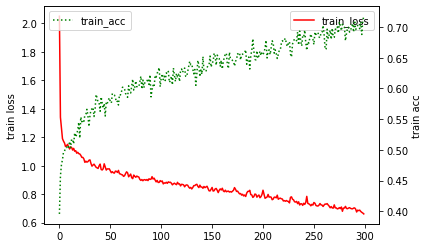

In [5]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(6,4))
ax1.plot(history.history['loss'], 'r-', label="train_loss")
ax1.set_ylabel("train loss")
ax1.legend()

ax2 = ax1.twinx()
ax2.plot(history.history['accuracy'],'g:',label="train_acc")
ax2.set_ylabel("train acc")
ax2.legend()
plt.show()